## Importing libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## load data

In [19]:
df = pd.read_csv('Property Prices in Tunisia.csv')
df

df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


## Data Preprocessing

In [20]:
#Replace -1 with nan
df = df.replace(-1,np.float('nan'))

In [21]:
#Drop duplicate rows
df.drop_duplicates(keep = 'first', inplace = True) 

In [22]:
#Require that many non-NA values.
df.dropna(thresh = 9, inplace=True)

In [23]:
dfVendre = df[df.type == 'À Vendre']
dfLouer = df[df.type == 'À Louer']

In [24]:
z1 = np.abs(stats.zscore(dfVendre.log_price)) #Calculate Z score for dfVebdre
z2 = np.abs(stats.zscore(dfLouer.log_price))  #Calculate Z score for dfAchat

In [25]:
dfVendre_O  = dfVendre[(z1 < 2.5)]
dfLouer_O  = dfLouer[(z2 < 2.5)]
print('Number of removed rows : ',dfVendre.shape[0]-dfVendre_O.shape[0])
print('Number of removed rows : ',dfLouer.shape[0]-dfLouer_O.shape[0])

Number of removed rows :  112
Number of removed rows :  83


<AxesSubplot:xlabel='size', ylabel='price'>

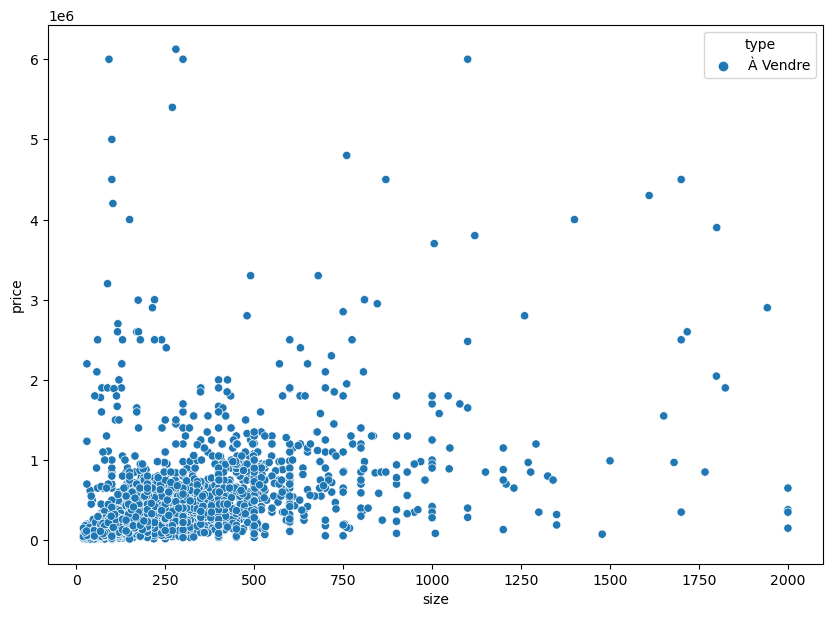

In [26]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre_O , x="size", y="price", hue="type")

<AxesSubplot:xlabel='size', ylabel='price'>

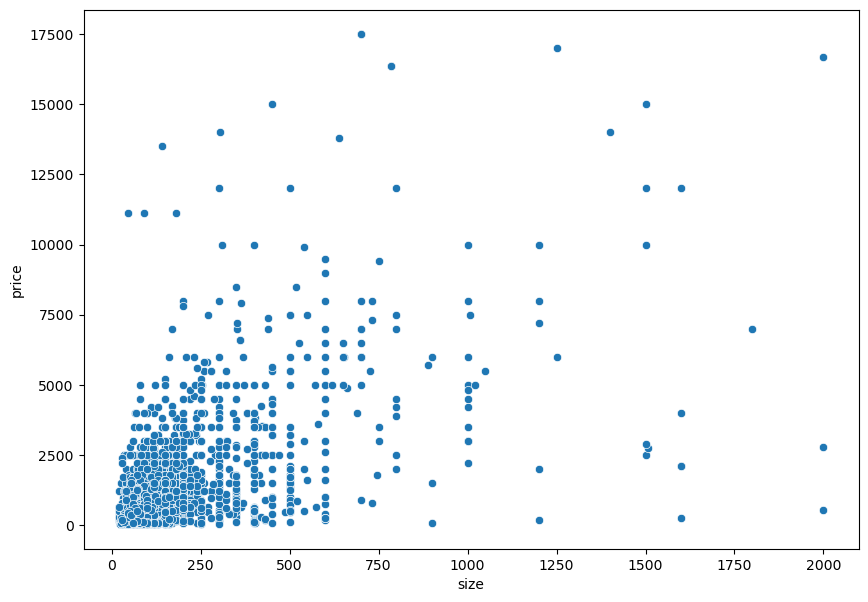

In [27]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfLouer_O , x="size", y="price")

In [28]:
## Importing Models and 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [30]:
#Concat the two dataframes
df_final = pd.concat([dfLouer_O,dfVendre_O])

In [31]:
df_final.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,Ariana,Autres villes,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075
7,"Magasins, Commerces et Locaux industriels",2.0,1.0,20.0,À Louer,650.0,Ariana,Borj Louzir,2.812913


In [32]:
for col in df_final:
  print(df_final[col].unique())
  print(df_final[col].value_counts())

['Appartements' 'Locations de vacances'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Colocations' 'Bureaux et Plateaux']
Appartements                                 4185
Maisons et Villas                            2813
Magasins, Commerces et Locaux industriels     587
Bureaux et Plateaux                           430
Locations de vacances                         256
Colocations                                    62
Name: category, dtype: int64
[ 2.  1.  5.  3.  4.  6.  7. 10.  9. 12.  8. 11. 20. 14. 18. 13. 15. 16.]
2.0     2551
3.0     2447
1.0     1479
4.0     1065
5.0      353
6.0      188
7.0       79
8.0       78
9.0       28
10.0      24
12.0      14
11.0       9
14.0       5
13.0       5
18.0       3
20.0       2
15.0       2
16.0       1
Name: room_count, dtype: int64
[ 1.  3.  2.  0.  4.  5.  8. 10.  7.  6.]
1.0     5815
2.0     1839
3.0      451
4.0      123
5.0       44
0.0       32
6.0       12
7.0        8
8.0        6
10.0       3
Name: bathroom_co

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final.category= le.fit_transform(df_final.category.values)
df_final.type= le.fit_transform(df_final.type.values)
df_final.city= le.fit_transform(df_final.city.values)
df_final.region= le.fit_transform(df_final.region.values)
    
df_final

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,0,2.0,1.0,80.0,0,380.0,0,6,2.579784
3,3,1.0,1.0,90.0,0,70.0,0,6,1.845098
5,3,1.0,1.0,70.0,0,80.0,0,6,1.903090
6,0,2.0,1.0,100.0,0,670.0,0,18,2.826075
7,4,2.0,1.0,20.0,0,650.0,0,18,2.812913
...,...,...,...,...,...,...,...,...,...
12739,4,2.0,1.0,100.0,1,50000.0,22,53,4.698970
12740,0,2.0,1.0,68.0,1,110000.0,22,28,5.041393
12741,0,2.0,1.0,140.0,1,250000.0,22,203,5.397940
12745,5,3.0,1.0,760.0,1,1950000.0,22,110,6.290035


In [34]:
for col in df_final:
  print(df_final[col].unique())
  print(df_final[col].value_counts())

[0 3 4 5 2 1]
0    4185
5    2813
4     587
1     430
3     256
2      62
Name: category, dtype: int64
[ 2.  1.  5.  3.  4.  6.  7. 10.  9. 12.  8. 11. 20. 14. 18. 13. 15. 16.]
2.0     2551
3.0     2447
1.0     1479
4.0     1065
5.0      353
6.0      188
7.0       79
8.0       78
9.0       28
10.0      24
12.0      14
11.0       9
14.0       5
13.0       5
18.0       3
20.0       2
15.0       2
16.0       1
Name: room_count, dtype: int64
[ 1.  3.  2.  0.  4.  5.  8. 10.  7.  6.]
1.0     5815
2.0     1839
3.0      451
4.0      123
5.0       44
0.0       32
6.0       12
7.0        8
8.0        6
10.0       3
Name: bathroom_count, dtype: int64
[  80.   90.   70.  100.   20.   40.  220.  180.  250.  130.   65.  430.
   75.  500.  450.  120.  110.  160.  108.   68.  230.   50.   83.  400.
  200.   27.   98.   60.   85.  140.  350.  300.  131.  150.  155.   95.
  105.  135.   66.   36.  190.   45.  117.   62.  420.   25.  170.  164.
  145.  175.  240. 1500.  147.  700.  119.   92.  138.  600

In [35]:
df_final

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,0,2.0,1.0,80.0,0,380.0,0,6,2.579784
3,3,1.0,1.0,90.0,0,70.0,0,6,1.845098
5,3,1.0,1.0,70.0,0,80.0,0,6,1.903090
6,0,2.0,1.0,100.0,0,670.0,0,18,2.826075
7,4,2.0,1.0,20.0,0,650.0,0,18,2.812913
...,...,...,...,...,...,...,...,...,...
12739,4,2.0,1.0,100.0,1,50000.0,22,53,4.698970
12740,0,2.0,1.0,68.0,1,110000.0,22,28,5.041393
12741,0,2.0,1.0,140.0,1,250000.0,22,203,5.397940
12745,5,3.0,1.0,760.0,1,1950000.0,22,110,6.290035


In [36]:
#Features and Target
X = df_final.drop(['price','log_price','region'],axis = 1)
y = df_final.price
#Our Model
model = RandomForestRegressor()

In [37]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [38]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
#Generate Predictions
preds = model.predict(x_test)

In [40]:
#Evaluation
result = (mean_absolute_error(y_test,preds))
print(result)

81369.26303959439


Here we should evaluate our model differently, we will use the evaluation of dfLouer

In [41]:
X.iloc[[85]]

,category,room_count,bathroom_count,size,type,city
251,5,3.0,1.0,155.0,0,0


In [42]:
y.iloc[85]

465.0

In [43]:
model.predict(X.iloc[[85]])

array([563.01])

### Tuning,

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [45]:
#Initialize my gridsearch parameters
Grid_par = [
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6],'max_depth' : [10,20,30]}]
    
model = RandomForestRegressor(n_jobs=-1)

In [46]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 5,
                         scoring='neg_mean_absolute_error', return_train_score=True)

In [47]:
start = time.time()
GridSearch.fit(x_train,y_train)
end = time.time()

In [48]:
print('Time used : ', end - start ,'Second')

Time used :  68.7167375087738 Second


In [49]:
results = GridSearch.cv_results_

In [50]:
print('Number of estimators : ' , len(results["params"]))
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print ((-mean_score),params)

Number of estimators :  144
85393.68446496569 {'max_features': 4, 'n_estimators': 5}
82207.4483120167 {'max_features': 4, 'n_estimators': 10}
81944.52021258252 {'max_features': 4, 'n_estimators': 20}
81374.36040592454 {'max_features': 4, 'n_estimators': 30}
79578.0381016117 {'max_features': 4, 'n_estimators': 50}
79903.92502980508 {'max_features': 4, 'n_estimators': 100}
88185.12713413863 {'max_features': 5, 'n_estimators': 5}
86247.48638011068 {'max_features': 5, 'n_estimators': 10}
82702.48113418563 {'max_features': 5, 'n_estimators': 20}
82121.85150638223 {'max_features': 5, 'n_estimators': 30}
81710.70881534272 {'max_features': 5, 'n_estimators': 50}
81239.17611146552 {'max_features': 5, 'n_estimators': 100}
89394.53045564331 {'max_features': 6, 'n_estimators': 5}
85242.67392397203 {'max_features': 6, 'n_estimators': 10}
84553.70980933873 {'max_features': 6, 'n_estimators': 20}
81786.65058351055 {'max_features': 6, 'n_estimators': 30}
83079.48746944136 {'max_features': 6, 'n_estima

In [51]:
-GridSearch.best_score_

77153.03850181524

In [52]:
best = GridSearch.best_estimator_

In [53]:
best.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=3, n_jobs=-1)

In [54]:
preds_grid = best.predict(x_test)

In [55]:
mean_absolute_error(y_test,preds_grid)

76600.7268516971

 ### Randomized

In [56]:
RandSearch = RandomizedSearchCV(estimator=model, param_distributions=Grid_par, cv = 5 ,
                               scoring='neg_mean_absolute_error', return_train_score=True,n_iter=20)

In [57]:
start = time.time()
RandSearch.fit(x_train,y_train)
end = time.time()

In [58]:
Randresult = RandSearch.cv_results_

In [59]:
print('Number of estimators : ' , len(Randresult["params"]))
for mean_score, params in zip(Randresult["mean_test_score"], Randresult["params"]):
    print ((-mean_score),params)

Number of estimators :  20
83871.4681731461 {'n_estimators': 10, 'max_features': 6}
88004.1755913466 {'n_estimators': 100, 'max_features': 5, 'max_depth': 20, 'bootstrap': False}
84861.80939920002 {'n_estimators': 50, 'max_features': 4, 'max_depth': 30, 'bootstrap': False}
89568.88140369953 {'n_estimators': 5, 'max_features': 4, 'max_depth': 30}
82472.02332811145 {'n_estimators': 30, 'max_features': 6}
97079.10810323147 {'n_estimators': 5, 'max_features': 6, 'max_depth': 20, 'bootstrap': False}
77191.70823760323 {'n_estimators': 100, 'max_features': 4, 'max_depth': 10}
85987.92562237168 {'n_estimators': 5, 'max_features': 4}
79342.99539713621 {'n_estimators': 100, 'max_features': 3, 'max_depth': 30}
89367.58213307608 {'n_estimators': 5, 'max_features': 5}
81399.03761964345 {'n_estimators': 20, 'max_features': 4, 'max_depth': 20}
88637.24081960382 {'n_estimators': 10, 'max_features': 5, 'bootstrap': False}
97735.39100382979 {'n_estimators': 100, 'max_features': 6, 'bootstrap': False}
97

In [60]:
best_rand = RandSearch.best_estimator_

In [61]:
best_rand.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=4, n_jobs=-1)

In [62]:
x_test.iloc[1]

category           0.0
room_count         2.0
bathroom_count     1.0
size              60.0
type               0.0
city              10.0
Name: 4601, dtype: float64

In [63]:
rand_preds = best_rand.predict(x_test)

In [64]:
MAE= mean_absolute_error(y_test,rand_preds)
R2 = r2_score(y_test,rand_preds)

In [65]:
print ('mean absolute error:', "%.2f" %(MAE), 'R2_Score : ', "%.2f" %(R2))

mean absolute error: 76178.70 R2_Score :  0.57


In [66]:
from sklearn.metrics import accuracy_score

In [67]:
best_rand

RandomForestRegressor(max_depth=10, max_features=4, n_jobs=-1)

In [68]:
print ('accuarcy:', best_rand.score(x_test,y_test)*100)

accuarcy: 57.16162444714045


# save the model

In [69]:
# save the model
import pickle
filename='housepricemodel.pkl'
pickle.dump(best_rand,open(filename,'wb'))

In [70]:
load_model=pickle.load(open(filename,'rb'))

In [71]:
load_model.predict([[5.0, 6.0  ,2.0, 155.0, 0.0, 0.0]])

array([1378.59375077])

In [73]:
print("Done")

Done
